<a href="https://colab.research.google.com/github/StarGonich/The-basics-of-Neural-networks/blob/main/Lab1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import math
import numpy as np
import time
## Imports for plotting
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('svg', 'pdf') # For export
from matplotlib.colors import to_rgba
import seaborn as sns
sns.set()
## Progress bar
from tqdm.notebook import tqdm

<ipython-input-129-efb065ca8ec2>:9: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats('svg', 'pdf') # For export


In [ ]:
import torch
print("Using torch", torch.__version__)

Using torch 2.4.0+cu121


In [ ]:
torch.manual_seed(42) # Setting the seed

In [ ]:
x = torch.Tensor(2, 3, 4)
print(x)

tensor([[[-1.9114e-32,  4.3740e-41, -1.9114e-32,  4.3740e-41],
         [ 0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00],
         [ 0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00]],

        [[ 0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00],
         [ 0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00],
         [ 0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00]]])


In [ ]:
x = torch.Tensor([[1, 2], [3, 4]])
print(x)

tensor([[1., 2.],
        [3., 4.]])


In [ ]:
x = torch.rand(2, 3, 4)
print(x)

tensor([[[0.8823, 0.9150, 0.3829, 0.9593],
         [0.3904, 0.6009, 0.2566, 0.7936],
         [0.9408, 0.1332, 0.9346, 0.5936]],

        [[0.8694, 0.5677, 0.7411, 0.4294],
         [0.8854, 0.5739, 0.2666, 0.6274],
         [0.2696, 0.4414, 0.2969, 0.8317]]])


In [ ]:
shape = x.shape
print("Shape:", x.shape)
size = x.size()
print("Size:", size)
dim1, dim2, dim3 = x.size()
print("Size:", dim1, dim2, dim3)

Shape: torch.Size([2, 3, 4])
Size: torch.Size([2, 3, 4])
Size: 2 3 4


In [ ]:
np_arr = np.array([[1, 2], [3, 4]])
tensor = torch.from_numpy(np_arr)
print("Numpy array:", np_arr)
print("PyTorch tensor:", tensor)

Numpy array: [[1 2]
 [3 4]]
PyTorch tensor: tensor([[1, 2],
        [3, 4]])


In [ ]:
x = torch.arange(6)
x = x.view(2, 3)
print("X", x)
W = torch.arange(9).view(3, 3) # We can also stack multiple operations in a single line
print("W", W)
h = torch.matmul(x, W)
print("h", h)

X tensor([[0, 1, 2],
        [3, 4, 5]])
W tensor([[0, 1, 2],
        [3, 4, 5],
        [6, 7, 8]])
h tensor([[15, 18, 21],
        [42, 54, 66]])


## Индексация

In [ ]:
x = torch.arange(12).view(3, 4)
print("X", x)
print(x[:, 1]) #второй столбец
print(x[0])      # Первая строка
print(x[:2, -1]) # Первые две строки, последний столбец
print(x[1:3, :]) # две строки в середине

X tensor([[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]])
tensor([1, 5, 9])
tensor([0, 1, 2, 3])
tensor([3, 7])
tensor([[ 4,  5,  6,  7],
        [ 8,  9, 10, 11]])


## Динамический граф вычислений и обратное распространение

In [ ]:
x = torch.ones((3,))
print(x)
print(x.requires_grad)

tensor([1., 1., 1.])
False


In [ ]:
x.requires_grad_(True)
print(x.requires_grad)

True


In [ ]:
x = torch.arange(3, dtype=torch.float32, requires_grad=True) # Only float tensors can have gradients
print("X", x)

X tensor([0., 1., 2.], requires_grad=True)


In [ ]:
a = x + 2
b = a ** 2
c = b + 3
print("c =", c)
y = c.mean()
print("Y =", y)

c = tensor([ 7., 12., 19.], grad_fn=<AddBackward0>)
Y = tensor(12.6667, grad_fn=<MeanBackward0>)


In [ ]:
y.backward()
print(y)

tensor(12.6667, grad_fn=<MeanBackward0>)


In [ ]:
print(x.grad)

tensor([1.3333, 2.0000, 2.6667])


## Поддержка GPU

In [ ]:
gpu_avail = torch.cuda.is_available()
print(f"Is the GPU available? {gpu_avail}")

Is the GPU available? False


In [ ]:
device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
print("Device", device)

Device cpu


In [ ]:
x = torch.zeros(2, 3)
x = x.to(device)
print("X", x)

X tensor([[0., 0., 0.],
        [0., 0., 0.]])


In [ ]:
x = torch.randn(5000, 5000)
## CPU version
start_time = time.time()
_ = torch.matmul(x, x)
end_time = time.time()
print(f"CPU time: {(end_time - start_time):6.5f}s")
## GPU version
x = x.to(device)
_ = torch.matmul(x, x)  # First operation to 'burn in' GPU
# CUDA is asynchronous, so we need to use different timing functions
start = torch.cuda.Event(enable_timing=True)
end = torch.cuda.Event(enable_timing=True)
start.record()
_ = torch.matmul(x, x)
end.record()
torch.cuda.synchronize()  # Waits for everything to finish running on the GPU
print(f"GPU time: {0.001 * start.elapsed_time(end):6.5f}s")  # Milliseconds to seconds

CPU time: 5.64167s


KeyboardInterrupt: 

## Генерация случайных чисел

In [ ]:
# GPU operations have a separate seed we also want to set
if torch.cuda.is_available():
    torch.cuda.manual_seed(42)
    torch.cuda.manual_seed_all(42)
# Additionally, some operations on a GPU are implemented stochastic for efficiency
# We want to ensure that all operations are deterministic on GPU (if used) for reproducibility
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False

## Модель

In [ ]:
import torch.nn as nn
import torch.nn.functional as F

In [ ]:
class SimpleClassifier(nn.Module):
    def __init__(self, num_inputs, num_outputs):
        super().__init__()
        # Initialize the modules we need to build the network
        self.linear1 = nn.Linear(num_inputs, num_outputs)
        self.act_fn = nn.Tanh()
    def forward(self, x):
        # Perform the calculation of the model to determine the prediction
        x = self.linear1(x)
        x = self.act_fn(x)
        return x

In [ ]:
model = SimpleClassifier(num_inputs=2, num_outputs=1)
# Printing a module shows all its submodules
print(model)

SimpleClassifier(
  (linear1): Linear(in_features=2, out_features=1, bias=True)
  (act_fn): Tanh()
)


In [ ]:
for name, param in model.named_parameters():
    print(f"Parameter {name}, shape {param.shape}")

Parameter linear1.weight, shape torch.Size([1, 2])
Parameter linear1.bias, shape torch.Size([1])


## Данные

In [ ]:
import torch.utils.data as data

## Определение своего класса данных

In [ ]:
class XORDataset(data.Dataset):
    def __init__(self, size, std=0.1):
        """
        Inputs:
            size - Number of data points we want to generate
            std - Standard deviation of the noise (see generate_continuous_xor function)
        """
        super().__init__()
        self.size = size
        self.std = std
        self.generate_continuous_xor()
    def generate_continuous_xor(self):
        # Each data point in the XOR dataset has two variables, x and y, that can be either 0 or 1
        # The label is their XOR combination, i.e. 1 if only x or only y is 1 while the other is 0.
        # If x=y, the label is 0.
        data = torch.randint(low=0, high=2, size=(self.size, 2), dtype=torch.float32)
        label = (data.sum(dim=1) == 1).to(torch.float32)
        # To make it slightly more challenging, we add a bit of gaussian noise to the data points.
        data += self.std * torch.randn(data.shape)
        self.data = data
        self.label = label
    def __len__(self):
        # Number of data point we have. Alternatively self.data.shape[0], or self.label.shape[0]
        return self.size
    def __getitem__(self, idx):
        # Return the idx-th data point of the dataset
        # If we have multiple things to return (data point and label), we can return them as tuple
        data_point = self.data[idx]
        data_label = self.label[idx]
        return data_point, data_label

In [ ]:
dataset = XORDataset(size=200)
print("Size of dataset:", len(dataset))
for el in dataset:
  print(el)

Size of dataset: 200
(tensor([0.8345, 0.0308]), tensor(1.))
(tensor([-0.0801,  1.0252]), tensor(1.))
(tensor([1.0399, 1.0742]), tensor(0.))
(tensor([0.0060, 1.0655]), tensor(1.))
(tensor([0.9494, 0.0144]), tensor(1.))
(tensor([1.0324, 0.0048]), tensor(1.))
(tensor([0.0522, 1.1192]), tensor(1.))
(tensor([1.0562, 0.0482]), tensor(1.))
(tensor([-0.0578, -0.0363]), tensor(0.))
(tensor([1.0032, 0.0658]), tensor(1.))
(tensor([ 0.9543, -0.1451]), tensor(1.))
(tensor([-0.2090,  1.0137]), tensor(1.))
(tensor([1.0938, 1.0012]), tensor(0.))
(tensor([-0.0765,  1.0752]), tensor(1.))
(tensor([ 1.0510, -0.0827]), tensor(1.))
(tensor([0.9797, 0.9929]), tensor(0.))
(tensor([1.1164, 0.8534]), tensor(0.))
(tensor([1.0947, 1.1427]), tensor(0.))
(tensor([1.1033, 0.9103]), tensor(0.))
(tensor([0.9632, 0.1117]), tensor(1.))
(tensor([1.1615, 0.0324]), tensor(1.))
(tensor([1.0501, 0.0513]), tensor(1.))
(tensor([0.1595, 1.0658]), tensor(1.))
(tensor([ 1.1061, -0.0381]), tensor(1.))
(tensor([-0.2801, -0.0241]), 

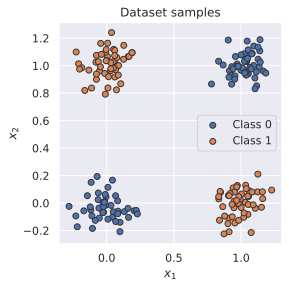

In [ ]:
def visualize_samples(data, label):
    if isinstance(data, torch.Tensor):
        data = data.cpu().numpy()
    if isinstance(label, torch.Tensor):
        label = label.cpu().numpy()
    data_0 = data[label == 0]
    data_1 = data[label == 1]
    plt.figure(figsize=(4,4))
    plt.scatter(data_0[:,0], data_0[:,1], edgecolor="#333", label="Class 0")
    plt.scatter(data_1[:,0], data_1[:,1], edgecolor="#333", label="Class 1")
    plt.title("Dataset samples")
    plt.ylabel(r"$x_2$")
    plt.xlabel(r"$x_1$")
    plt.legend()
visualize_samples(dataset.data, dataset.label)
plt.show()

In [ ]:
data_loader = data.DataLoader(dataset, batch_size=8, shuffle=True)

In [ ]:
data_inputs, data_labels = next(iter(data_loader))
# The shape of the outputs are [batch_size, d_1,...,d_N] where d_1,...,d_N are the
# dimensions of the data point returned from the dataset class
print("Data inputs", data_inputs.shape, "\n", data_inputs)
print("Data labels", data_labels.shape, "\n", data_labels)

Data inputs torch.Size([8, 2]) 
 tensor([[ 1.0271,  1.0645],
        [ 1.0828,  1.0891],
        [ 1.0947,  1.1427],
        [ 0.9028, -0.1499],
        [ 1.0428,  1.0384],
        [ 0.1273,  1.1477],
        [ 1.0399,  1.0742],
        [-0.0620,  1.0288]])
Data labels torch.Size([8]) 
 tensor([0., 0., 0., 1., 0., 1., 0., 1.])


## Функция ошибки

In [ ]:
loss_module = nn.BCEWithLogitsLoss()

## Стохастический градиентный спуск

In [ ]:
# Input to the optimizer are the parameters of the model: model.parameters()
optimizer = torch.optim.SGD(model.parameters(), lr=0.1)

## Обучение

In [ ]:
train_dataset = XORDataset(size=2500)
train_data_loader = data.DataLoader(train_dataset, batch_size=128, shuffle=True)

In [ ]:
# Push model to device. Has to be only done once
model.to(device)

SimpleClassifier(
  (linear1): Linear(in_features=2, out_features=1, bias=True)
  (act_fn): Tanh()
)

In [ ]:
def train_model(model, optimizer, data_loader, loss_module, num_epochs=100):
    # Set model to train mode
    model.train()
    # Training loop
    for epoch in tqdm(range(num_epochs)):
        for data_inputs, data_labels in data_loader:
            ## Step 1: Move input data to device (only strictly necessary if we use GPU)
            data_inputs = data_inputs.to(device)
            data_labels = data_labels.to(device)
            ## Step 2: Run the model on the input data
            preds = model(data_inputs)
            preds = preds.squeeze(dim=1) # Output is [Batch size, 1], but we want [Batch size]
            ## Step 3: Calculate the loss
            loss = loss_module(preds, data_labels.float())
            ## Step 4: Perform backpropagation
            # Before calculating the gradients, we need to ensure that they are all zero.
            # The gradients would not be overwritten, but actually added to the existing ones.
            optimizer.zero_grad()
            # Perform backpropagation
            loss.backward()
            ## Step 5: Update the parameters
            optimizer.step()
train_model(model, optimizer, train_data_loader, loss_module)


  0%|          | 0/100 [00:00<?, ?it/s]

In [ ]:
state_dict = model.state_dict()
print(state_dict)

OrderedDict([('linear1.weight', tensor([[ 3.3042, -3.5038]])), ('linear1.bias', tensor([-1.7451]))])


In [ ]:
# torch.save(object, filename). For the filename, any extension can be used
torch.save(state_dict, "our_model.pth")

In [ ]:
# Load state dict from the disk (make sure it is the same name as above)
state_dict = torch.load("our_model.pth")
# Create a new model and load the state
new_model = SimpleClassifier(num_inputs=2,  num_outputs=1)
new_model.load_state_dict(state_dict)
# Verify that the parameters are the same
print("Original model\n", model.state_dict())
print("\nLoaded model\n", new_model.state_dict())

Original model
 OrderedDict([('linear1.weight', tensor([[ 3.3042, -3.5038]])), ('linear1.bias', tensor([-1.7451]))])

Loaded model
 OrderedDict([('linear1.weight', tensor([[ 3.3042, -3.5038]])), ('linear1.bias', tensor([-1.7451]))])


<ipython-input-167-5cad4acbb4d4>:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state_dict = torch.load("our_model.pth")


In [ ]:
test_dataset = XORDataset(size=500)
# drop_last -> Don't drop the last batch although it is smaller than 128
test_data_loader = data.DataLoader(test_dataset, batch_size=128, shuffle=False, drop_last=False)

In [ ]:
def eval_model(model, data_loader):
    model.eval() # Set model to eval mode
    true_preds, num_preds = 0., 0.
    with torch.no_grad(): # Deactivate gradients for the following code
        for data_inputs, data_labels in data_loader:
            # Determine prediction of model on dev set
            data_inputs, data_labels = data_inputs.to(device), data_labels.to(device)
            preds = model(data_inputs)
            preds = preds.squeeze(dim=1)
            preds = torch.sigmoid(preds) # Sigmoid to map predictions between 0 and 1
            pred_labels = (preds >= 0.5).long() # Binarize predictions to 0 and 1
            # Keep records of predictions for the accuracy metric (true_preds=TP+TN, num_preds=TP+TN+FP+FN)
            true_preds += (pred_labels == data_labels).sum()
            num_preds += data_labels.shape[0]
    acc = true_preds / num_preds
    print(f"Accuracy of the model: {100.0*acc:4.2f}%")
eval_model(model, test_data_loader)

Accuracy of the model: 74.60%


# Задания

### Задание 1: Создайте два вещественных тензора: a размером (5, 4) и b размером (12,)

In [ ]:
a = torch.Tensor(5, 4)
print(a)
b = torch.Tensor(12,)
print(b)

tensor([[ 3.3717e+21,  3.2292e-41, -4.2347e-30,  4.3739e-41],
        [ 0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00],
        [ 0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00],
        [ 0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00],
        [ 1.4013e-45,  0.0000e+00,  0.0000e+00,  0.0000e+00]])
tensor([-1.9114e-32,  4.3740e-41,  3.4355e+22,  3.2292e-41,  4.4842e-44,
         0.0000e+00,  4.4842e-44,  0.0000e+00, -7.0465e+03,  3.2287e-41,
         0.0000e+00,  1.4013e-45])


## Задание 2: Создайте тензор c, являющийся тензором b, но размера (2, 2, 3)

In [ ]:
c = b.view(2, 2, 3)
print(c)

tensor([[[-1.9114e-32,  4.3740e-41,  3.4355e+22],
         [ 3.2292e-41,  4.4842e-44,  0.0000e+00]],

        [[ 4.4842e-44,  0.0000e+00, -7.0465e+03],
         [ 3.2287e-41,  0.0000e+00,  1.4013e-45]]])


## Задание 3: Выведите второй столбец матрицы a с помощью индексации

In [ ]:
print(a[:, 1])

tensor([3.2292e-41, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00])


## Задание 4: Создайте два вещественных тензора: a размером (6, 2) и b размером (1,12)


In [ ]:
a = torch.Tensor(6, 2)
print(a)
b = torch.Tensor(1, 12)
print(b)

tensor([[4.3874e+22, 3.2292e-41],
        [7.4814e+22, 3.2292e-41],
        [0.0000e+00, 0.0000e+00],
        [0.0000e+00, 0.0000e+00],
        [0.0000e+00, 0.0000e+00],
        [3.7779e+22, 0.0000e+00]])
tensor([[-2.9666e+03,  3.2287e-41,  0.0000e+00,  1.1755e-38,  1.6349e+19,
          3.2292e-41,  1.0842e-19,  0.0000e+00,  4.7866e+22,  3.2292e-41,
          2.0193e+22,  3.2292e-41]])


## Задание 5: Создайте тензор c, являющийся тензором b, но размера (6, 2), произведите все арифметические операции с тензорами a и c

In [ ]:
c = b.view(6, 2)
print(c)

print()
sum = a + c
print(f"a = {a}\nc = {c}\nsum={sum}")

tensor([[-2.9666e+03,  3.2287e-41],
        [ 0.0000e+00,  1.1755e-38],
        [ 1.6349e+19,  3.2292e-41],
        [ 1.0842e-19,  0.0000e+00],
        [ 4.7866e+22,  3.2292e-41],
        [ 2.0193e+22,  3.2292e-41]])

a = tensor([[4.3874e+22, 3.2292e-41],
        [7.4814e+22, 3.2292e-41],
        [0.0000e+00, 0.0000e+00],
        [0.0000e+00, 0.0000e+00],
        [0.0000e+00, 0.0000e+00],
        [3.7779e+22, 0.0000e+00]])
c = tensor([[-2.9666e+03,  3.2287e-41],
        [ 0.0000e+00,  1.1755e-38],
        [ 1.6349e+19,  3.2292e-41],
        [ 1.0842e-19,  0.0000e+00],
        [ 4.7866e+22,  3.2292e-41],
        [ 2.0193e+22,  3.2292e-41]])
sum=tensor([[4.3874e+22, 6.4579e-41],
        [7.4814e+22, 1.1787e-38],
        [1.6349e+19, 3.2292e-41],
        [1.0842e-19, 0.0000e+00],
        [4.7866e+22, 3.2292e-41],
        [5.7972e+22, 3.2292e-41]])


In [ ]:
# Данные XOR
# X = torch.tensor([[0., 0.],
#                   [0., 1.],
#                   [1., 0.],
#                   [1., 1.],
#                   [1.5, 1],
#                   [0.5, 0]])
# y = torch.tensor([[0.], [1.], [1.], [0.], [1.], [0.]])

X = torch.Tensor(dataset[0:][0])
y = torch.Tensor(dataset[0:][1]).view(200, 1)
print(X)
print(y)

tensor([[ 8.3453e-01,  3.0819e-02],
        [-8.0113e-02,  1.0252e+00],
        [ 1.0399e+00,  1.0742e+00],
        [ 5.9916e-03,  1.0655e+00],
        [ 9.4942e-01,  1.4442e-02],
        [ 1.0324e+00,  4.8143e-03],
        [ 5.2194e-02,  1.1192e+00],
        [ 1.0562e+00,  4.8186e-02],
        [-5.7825e-02, -3.6324e-02],
        [ 1.0032e+00,  6.5832e-02],
        [ 9.5429e-01, -1.4508e-01],
        [-2.0904e-01,  1.0137e+00],
        [ 1.0938e+00,  1.0012e+00],
        [-7.6481e-02,  1.0752e+00],
        [ 1.0510e+00, -8.2684e-02],
        [ 9.7974e-01,  9.9289e-01],
        [ 1.1164e+00,  8.5344e-01],
        [ 1.0947e+00,  1.1427e+00],
        [ 1.1033e+00,  9.1029e-01],
        [ 9.6324e-01,  1.1173e-01],
        [ 1.1615e+00,  3.2387e-02],
        [ 1.0501e+00,  5.1287e-02],
        [ 1.5951e-01,  1.0658e+00],
        [ 1.1061e+00, -3.8136e-02],
        [-2.8010e-01, -2.4121e-02],
        [ 1.1397e+00,  1.1080e+00],
        [-7.6227e-02,  9.0064e-01],
        [ 1.1658e+00,  9.603

In [ ]:
class XORModel(nn.Module):
    def __init__(self):
        super(XORModel, self).__init__()
        self.fc = nn.Linear(2, 1)  # Вход: 2, Выход: 1

    def forward(self, x):
        return torch.sigmoid(self.fc(x))

In [ ]:
import torch.optim as optim

In [ ]:
# Инициализация модели, функции потерь и оптимизатора
model = XORModel()
criterion = nn.BCELoss()
optimizer = optim.SGD(model.parameters(), lr=0.1)

# Обучение
num_epochs = 10000
for epoch in range(num_epochs):
    model.train()
    optimizer.zero_grad()
    output = model(X)
    loss = criterion(output, y)
    loss.backward()
    optimizer.step()

    if (epoch+1) % 1000 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

Epoch [1000/10000], Loss: 0.6916
Epoch [2000/10000], Loss: 0.6916
Epoch [3000/10000], Loss: 0.6916
Epoch [4000/10000], Loss: 0.6916
Epoch [5000/10000], Loss: 0.6916
Epoch [6000/10000], Loss: 0.6916
Epoch [7000/10000], Loss: 0.6916
Epoch [8000/10000], Loss: 0.6916
Epoch [9000/10000], Loss: 0.6916
Epoch [10000/10000], Loss: 0.6916


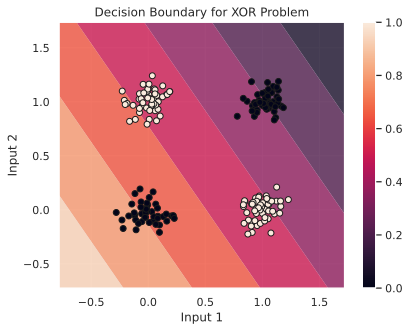

In [ ]:
# Визуализация
def plot_decision_boundary(model, X, y):
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))
    Z = model(torch.tensor(np.c_[xx.ravel(), yy.ravel()]).float()).detach().numpy()
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o')
    plt.xlabel('Input 1')
    plt.ylabel('Input 2')
    plt.title('Decision Boundary for XOR Problem')
    plt.colorbar()
    plt.show()

plot_decision_boundary(model, X.numpy(), y.numpy())